# Edge detection with High Pass Filters

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

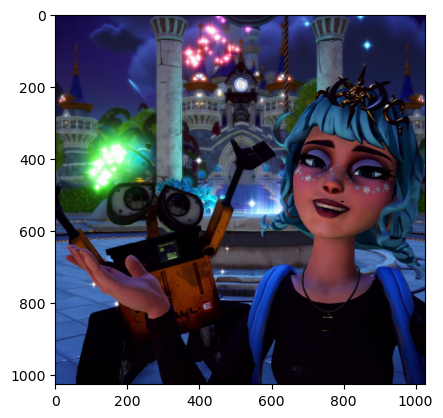

In [37]:
#Read in the image
pic = r"C:\Users\Warmtebron\Documents\School\AI_Advanced\Core 3\Dreamlight.jpg"
image = mpimg.imread(pic)

plt.imshow(image)

# Convert picture to greyscale

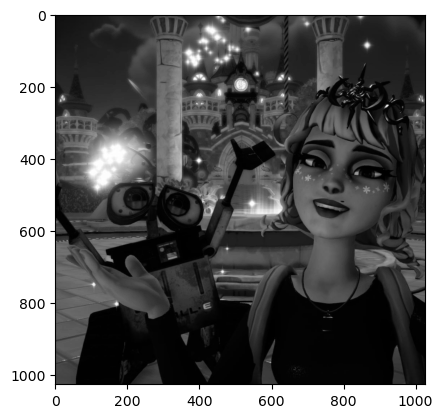

In [38]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

#display image
plt.imshow(gray, cmap='gray')

In [39]:
#Create a custom kernel

#gaussian blur filter
gblur = np.array( [ [ 1, 2, 1 ],
                    [ 2, 4, 2 ],
                    [ 1, 2, 1]  ]) / 16

#alternative gaussian blur applied directly to image
gblur_alt = cv2.GaussianBlur(gray, (3,3), 0)

#mean blur
mblur = np.array(    [ [ 1, 1, 1 ],
                        [ 1, 1, 1 ],
                        [ 1, 1, 1]  ]) / 9

#alternative

mblur_alt = np.ones((3,3), np.float32) / 9

#3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

#Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])

Plotting the images with the mean blur

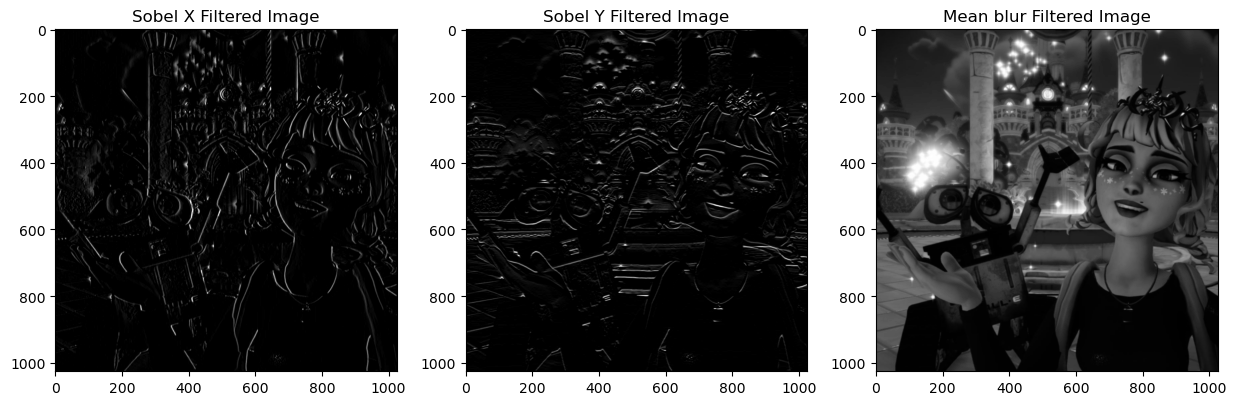

In [40]:
filtered_image_blur = cv2.filter2D(gray, -1, mblur)
filtered_image_x = cv2.filter2D(filtered_image_blur, -1, sobel_x)
filtered_image_y = cv2.filter2D(filtered_image_blur, -1, sobel_y)

# Plot the images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(filtered_image_x, cmap='gray')
ax[0].set_title('Sobel X Filtered Image')
ax[1].imshow(filtered_image_y, cmap='gray')
ax[1].set_title('Sobel Y Filtered Image')
ax[2].imshow(filtered_image_blur, cmap='gray')
ax[2].set_title('Mean blur Filtered Image')
plt.show()

Plotting the images with the gaussian blur

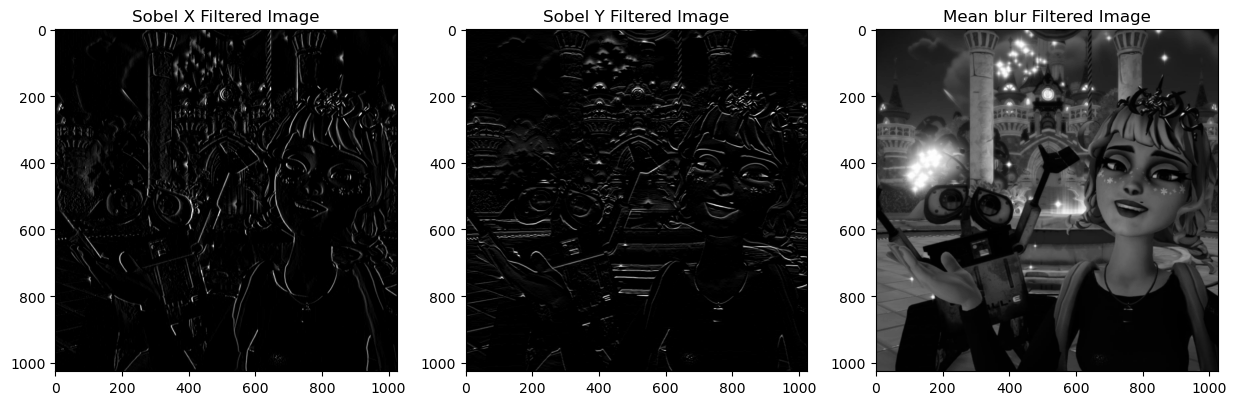

In [41]:
filtered_image_blur = cv2.filter2D(gray, -1, gblur)
filtered_image_x = cv2.filter2D(filtered_image_blur, -1, sobel_x)
filtered_image_y = cv2.filter2D(filtered_image_blur, -1, sobel_y)

# Plot the images side-by-side
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(filtered_image_x, cmap='gray')
ax[0].set_title('Sobel X Filtered Image')
ax[1].imshow(filtered_image_y, cmap='gray')
ax[1].set_title('Sobel Y Filtered Image')
ax[2].imshow(filtered_image_blur, cmap='gray')
ax[2].set_title('Mean blur Filtered Image')
plt.show()

# Sum the images

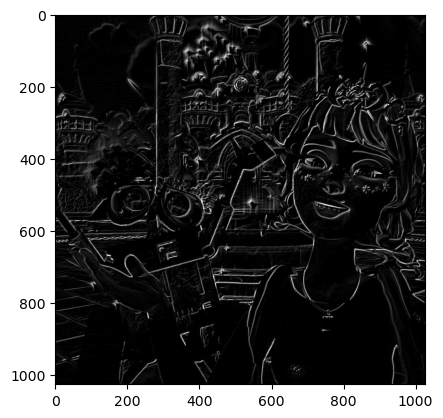

In [45]:
#option 1
final_image = filtered_image_x + filtered_image_y
#option 2
final_image1 = cv2.add(filtered_image_x, filtered_image_y)

plt.imshow(final_image, cmap='gray')

# A larger kernel

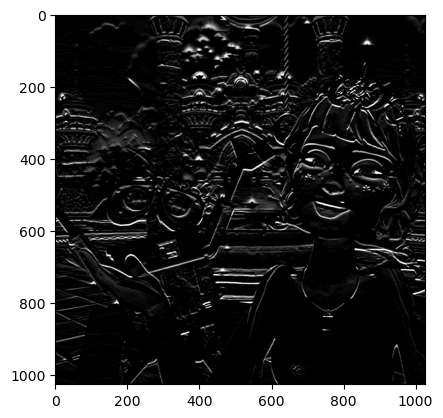

In [43]:
my_y = np.array( [[-1, -2, -1],
                  [ 0, 0, 0],
                  [ 0, 0, 0],
                  [ 0, 0, 0],
                  [ 1, 2, 1]])

filtered_image3 = cv2.filter2D(gray, -1, my_y)
plt.imshow(filtered_image3, cmap='gray')